In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
import keras
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

directory = 'wasp-waisted'
waspWaisted = {}

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    print(f'Reading file: {filepath}')
    df = pd.read_csv(filepath, delimiter='\t') 
     
    df.drop(columns=['Moment [Am^2]'], inplace=True)

    half = df.shape[0] // 2
    df1 = df.iloc[:half, :]
    df2 = df.iloc[half:, :]
    df2.reset_index(drop=True, inplace=True)
    df_combined = pd.concat([df1, df2], axis=1)
    df_combined.iloc[:, 0] = df_combined.iloc[::-1, 0].values
    df_combined.iloc[:, 1] = df_combined.iloc[::-1, 1].values
    data = df_combined.values

    df = pd.DataFrame(data=data, columns=['Field (T)', 'Fitted Moment (T)', 'Field (B)', 'Fitted Moment (B)'])
    df = df.apply(lambda x: -1 + 2 * ((x - x.min()) / (x.max() - x.min())))
    x_range = np.linspace(-1, 1, 512)
    
    top_interpolated = np.interp(x_range, df['Field (T)'], df['Fitted Moment (T)'])
    bottom_interpolated = np.interp(x_range, df['Field (B)'], df['Fitted Moment (B)'])
    
    df = pd.DataFrame(
        data=np.concatenate(
            (
                x_range.reshape(-1, 1),
                top_interpolated.reshape(-1, 1),
                bottom_interpolated.reshape(-1, 1),
            ),
            axis=1,
        ),
        columns=[
            'Field',
            'Fitted Moment (T)',
            'Fitted Moment (B)',
        ]
    )
    top_gradients = np.gradient(df['Fitted Moment (T)'], df['Field'])
    bottom_gradients = np.gradient(df['Fitted Moment (B)'], df['Field'])
    gradients_top = np.gradient(top_gradients, bottom_gradients)
    gradients_bottom = np.gradient(bottom_gradients, top_gradients)
    df.insert(3, "Top Gradient", top_gradients )
    df.insert(4, "Bottom Gradient", bottom_gradients )
    df.drop(['Fitted Moment (T)'], axis=1, inplace=True)
    df.drop(['Fitted Moment (B)'], axis=1, inplace=True)
    array = df.values
    waspWaisted[filename] = array

print(waspWaisted)

directory = 'gooseneck'
gooseneck = {}

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    print(f'Reading file: {filepath}')
    df = pd.read_csv(filepath, delimiter='\t') 
     
    df.drop(columns=['Moment [Am^2]'], inplace=True)

    half = df.shape[0] // 2
    df1 = df.iloc[:half, :]
    df2 = df.iloc[half:, :]
    df2.reset_index(drop=True, inplace=True)
    df_combined = pd.concat([df1, df2], axis=1)
    df_combined.iloc[:, 0] = df_combined.iloc[::-1, 0].values
    df_combined.iloc[:, 1] = df_combined.iloc[::-1, 1].values
    data = df_combined.values

    df = pd.DataFrame(data=data, columns=['Field (T)', 'Fitted Moment (T)', 'Field (B)', 'Fitted Moment (B)'])
    df = df.apply(lambda x: -1 + 2 * ((x - x.min()) / (x.max() - x.min())))
    x_range = np.linspace(-1, 1, 512)
    
    top_interpolated = np.interp(x_range, df['Field (T)'], df['Fitted Moment (T)'])
    bottom_interpolated = np.interp(x_range, df['Field (B)'], df['Fitted Moment (B)'])
    
    df = pd.DataFrame(
        data=np.concatenate(
            (
                x_range.reshape(-1, 1),
                top_interpolated.reshape(-1, 1),
                bottom_interpolated.reshape(-1, 1),
            ),
            axis=1,
        ),
        columns=[
            'Field',
            'Fitted Moment (T)',
            'Fitted Moment (B)',
        ]
    )
    top_gradients = np.gradient(df['Fitted Moment (T)'], df['Field'])
    bottom_gradients = np.gradient(df['Fitted Moment (B)'], df['Field'])
    gradients_top = np.gradient(top_gradients, bottom_gradients)
    gradients_bottom = np.gradient(bottom_gradients, top_gradients)
    df.insert(3, "Top Gradient", top_gradients )
    df.insert(4, "Bottom Gradient", bottom_gradients )
    df.drop(['Fitted Moment (T)'], axis=1, inplace=True)
    df.drop(['Fitted Moment (B)'], axis=1, inplace=True)
    array = df.values
    gooseneck[filename] = array


directory = 'regular'
regular = {}
count = 1
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    print(f'Reading file: {filepath}')
    df = pd.read_csv(filepath, delimiter='\t') 
     
    df.drop(columns=['Moment [Am^2]'], inplace=True)

    half = df.shape[0] // 2
    df1 = df.iloc[:half, :]
    df2 = df.iloc[half:, :]
    df2.reset_index(drop=True, inplace=True)
    df_combined = pd.concat([df1, df2], axis=1)
    df_combined.iloc[:, 0] = df_combined.iloc[::-1, 0].values
    df_combined.iloc[:, 1] = df_combined.iloc[::-1, 1].values
    data = df_combined.values

    df = pd.DataFrame(data=data, columns=['Field (T)', 'Fitted Moment (T)', 'Field (B)', 'Fitted Moment (B)'])
    df = df.apply(lambda x: -1 + 2 * ((x - x.min()) / (x.max() - x.min())))
    x_range = np.linspace(-1, 1, 512)
    
    top_interpolated = np.interp(x_range, df['Field (T)'], df['Fitted Moment (T)'])
    bottom_interpolated = np.interp(x_range, df['Field (B)'], df['Fitted Moment (B)'])
    
    df = pd.DataFrame(
        data=np.concatenate(
            (
                x_range.reshape(-1, 1),
                top_interpolated.reshape(-1, 1),
                bottom_interpolated.reshape(-1, 1),
            ),
            axis=1,
        ),
        columns=[
            'Field',
            'Fitted Moment (T)',
            'Fitted Moment (B)',
        ]
    )
    top_gradients = np.gradient(df['Fitted Moment (T)'], df['Field'])
    bottom_gradients = np.gradient(df['Fitted Moment (B)'], df['Field'])
    gradients_top = np.gradient(top_gradients, bottom_gradients)
    gradients_bottom = np.gradient(bottom_gradients, top_gradients)
    df.insert(3, "Top Gradient", top_gradients )
    df.insert(4, "Bottom Gradient", bottom_gradients )
    df.drop(['Fitted Moment (T)'], axis=1, inplace=True)
    df.drop(['Fitted Moment (B)'], axis=1, inplace=True)
    array = df.values
    regular[filename] = array
    count = count + 1
print(count)



combined_dict = {k: v for d in (waspWaisted, gooseneck, regular) for k, v in d.items()}
X = np.array([v for v in combined_dict.values()])
X.shape

Reading file: wasp-waisted\9H-N14N_Hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\A01-0059_Sequence_KZ - 1_Loops_corrected.dat
Reading file: wasp-waisted\AH114_Sequence_3 - 1_Loops_corrected.dat
Reading file: wasp-waisted\AH90_Sequence_31 - 1_Loops_corrected.dat
Reading file: wasp-waisted\B01-07F_Sequence_3 - 1_Loops_corrected.dat
Reading file: wasp-waisted\B01-35E_Sequence_3 - 1_Loops_corrected.dat
Reading file: wasp-waisted\B01-37aA_Sequence_3 - 1_Loops_corrected.dat
Reading file: wasp-waisted\CDJ3A - 1_Loops_corrected.dat
Reading file: wasp-waisted\Grav1-2B - 1_corrected.dat
Reading file: wasp-waisted\Grav2-1H - 1_corrected.dat
Reading file: wasp-waisted\GS10_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS1_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS2_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS3_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS4_hyst - 1_Loops_corrected.dat
Reading file: wasp-waisted\GS5_hyst - 1_Loops_corre

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: wasp-waisted\TQ21_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ21_Loops_corrected.dat
Reading file: wasp-waisted\TQ22_Loops_corrected.dat
Reading file: wasp-waisted\TQ33_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ34_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ35_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ35_Loops_corrected.dat
Reading file: wasp-waisted\TQ36_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ37_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ38_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ38_Loops_corrected.dat
Reading file: wasp-waisted\TQ39_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ41_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ42_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ43_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ44_23_Loops_corrected.dat
Reading file: wasp-waisted\TQ46H_Loops_corrected.dat
Reading file: wasp-waisted\TQ47A_Loops_corrected.dat
Reading file: wasp-waisted

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: wasp-waisted\ZK13_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK15_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK16_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK17_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK18_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK20_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\Zk21_hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK2_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK30_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK31_Hyst - 1_Loops_correction.dat
Reading file: wasp-waisted\ZK3_Hyst - 1_Loops_correction.dat
{'9H-N14N_Hyst - 1_Loops_corrected.dat': array([[-1.        ,  0.        , -0.01795364],
       [-0.99608611,  0.00294727, -0.01273965],
       [-0.99217221,  0.00801327, -0.00540627],
       ...,
       [ 0.99217221, -0.00540627,  0.00801327],
       [ 0.99608611, -0.01273965,  0.00294727],
       [ 1.        , -0.017

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1298: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invali

Reading file: gooseneck\B01-33aE_Sequence_3 - 1_Loops_corrected.dat
Reading file: gooseneck\B01-33b_Sequence_3 - 1_Loops_corrected.dat
Reading file: gooseneck\B01-34A_Sequence_3 - 1_Loops_corrected.dat
Reading file: gooseneck\B01-36B_Sequence_3 - 1_Loops_corrected.dat
Reading file: gooseneck\FT006_Hyst - 1_Loops_corrected.dat
Reading file: gooseneck\FT009_Hyst - 1_Loops_corrected.dat
Reading file: gooseneck\FT019_Hyst - 1_Loops_corrected.dat
Reading file: gooseneck\Grav1-1A - 1_corrected.dat
Reading file: gooseneck\Grav1-1V - 1_corrected.dat
Reading file: gooseneck\Grav2-1A - 1_corrected.dat
Reading file: gooseneck\Grav2-2J - 1_corrected.dat
Reading file: gooseneck\Grav2-3B - 1_corrected.dat
Reading file: gooseneck\Grav2-3G - 1 corrected.dat
Reading file: gooseneck\GS7_hyst - 1_Loops_corrected.dat
Reading file: gooseneck\KUB3_hyst - 1_Loops_corrected.dat
Reading file: gooseneck\OU_4RS5 - 1_Loops_corrected.dat
Reading file: gooseneck\TC18_Loops_corrected.dat
Reading file: gooseneck\TC33

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: gooseneck\TVQ1_hyst - 1_Loops_corrected.dat
Reading file: gooseneck\TVQ5_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK001_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK002_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK004_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK005_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK008_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK009_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK015_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK016_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK018_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK019_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK020_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK022_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK029_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK030_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK037_hyst - 1_Loops_corrected.dat

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\18AK080_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK082_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK084_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK088_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK093_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK094_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK095_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK099_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK108_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK109_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK110_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK111_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK112_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK116_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK123_hyst - 1_Loops_corrected.dat
Reading file: regular\18AK127_hyst - 1_Loops_corrected.dat
Reading file: regular\19TQ011_hyst - 1_Loops_corrected.d

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\247-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\249-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\250-1_Sequence_31 - 1_Loops_corrected.dat
Reading file: regular\250a-1_Sequence_31 - 1_Loops_corrected.dat
Reading file: regular\251-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\252b-1_Sequence_31 - 1_Loops_corrected.dat
Reading file: regular\252nb-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\257-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\258-1_Sequence_2 - 1_Loops_corrected.dat
Reading file: regular\259-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\260-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\261-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\261a-1_Sequence-11 - 1_Loops_corrected.dat
Reading file: regular\262-1_Sequence-111 - 1_Loops_corrected.dat
Reading file: regular\269a1-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\269a2-1_Sequence11 - 1_

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\287a-1_Sequence1 - 1_Loops_corrected.dat
Reading file: regular\288a-1_Sequence - 1_Loops_corrected.dat
Reading file: regular\288b-1_Sequence-111 - 1_Loops_corrected.dat
Reading file: regular\289-1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\9H-N04N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N07N_v2_Hyst1 - 1_Loops_corrected.dat
Reading file: regular\9H-N10N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N11N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N12N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N15N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N17_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N18N_Hyst - 1_Loops_corrected.dat
Reading file: regular\9H-N23N_Hyst - 1_Loops_corrected.dat
Reading file: regular\A01-0018_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0022_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0030_Sequence_KZ - 1_Loops_corrected.dat
Reading fil

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\A01-0374_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0378_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0430_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0442_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0448_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0452_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0456_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0502_Sequence_KZ1 - 1_Loops_corrected.dat
Reading file: regular\A01-0504_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0506_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0524_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0528_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0532_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0590_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-0594_Sequence_KZ - 1_Loops_correcte

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\A01-3979_Sequence_KZ11 - 1_Loops_corrected.dat
Reading file: regular\A01-3987_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4093_Sequence_KZ11 - 1_Loops_corrected.dat
Reading file: regular\A01-4194_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4198_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4290_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4302_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4390_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4402_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4446_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4490_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4494_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4506_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4508_Sequence_KZ - 1_Loops_corrected.dat
Reading file: regular\A01-4510_Sequence_KZ - 1_Loops_corre

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1298: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divid

Reading file: regular\AH58_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH59_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH61_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH67_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH68_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH69_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH74_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH75_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AH78_Sequence_31 - 1_Loops_corrected.dat
Reading file: regular\AH81_Sequence_31 - 1_Loops_corrected.dat
Reading file: regular\AH84_Sequence_31 - 1_Loops_corrected.dat
Reading file: regular\AH98_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AK006_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\AK012_Sequence1_Hyst - 1_Loops_corrected.dat
Reading file: regular\AK023_Sequence1_Hyst - 1_Loops_corrected.dat
Reading file: regular\AK024_Sequence1_Hyst - 1_Loops_cor

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1298: RuntimeWarning: invalid value encountered in add
  out[tuple(slice1)] = a * f[tuple(slice2)] + b * f[tuple(slice3)] + c * f[tuple(slice4)]
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invali

Reading file: regular\B01-27A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-27H_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-30G_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-34F_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-35A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-37b_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-37C_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-38A_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\B01-38H_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\CDJ10J - 1_Loops_corrected.dat
Reading file: regular\CDJ4M - 1_Loops_corrected.dat
Reading file: regular\CDJ6G - 1_Loops_corrected.dat
Reading file: regular\CS10-2_hyst - 1_Loops_corrected.dat
Reading file: regular\CS10-3_hyst - 1_Loops_corrected.dat
Reading file: regular\CS11-1_hyst - 1_Loops_corrected.dat
Reading file: regular\CS11-2_hyst - 1_Loops_corrected.dat
Reading file: regular\CS14

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\Grav1-1L - 1_corrected.dat
Reading file: regular\Grav1-1Q - 1_corrected.dat
Reading file: regular\Grav2-2A - 1_corrected.dat
Reading file: regular\GZ10A - 1_Loops_corrected.dat
Reading file: regular\GZ10G - 1_Loops_corrected.dat
Reading file: regular\GZ11A - 1_Loops_corrected.dat
Reading file: regular\GZ11i - 1_Loops_corrected.dat
Reading file: regular\GZ12A - 1_Loops_corrected.dat
Reading file: regular\GZ12H - 1_Loops_corrected.dat
Reading file: regular\GZ13A - 1_Loops_corrected.dat
Reading file: regular\GZ13J - 1_Loops_corrected.dat
Reading file: regular\GZ14A - 1_Loops_corrected.dat
Reading file: regular\GZ14M - 1_Loops_corrected.dat
Reading file: regular\GZ15A - 1_Loops_corrected.dat
Reading file: regular\GZ15J - 1_Loops_corrected.dat
Reading file: regular\GZ16A - 1_Loops_corrected.dat
Reading file: regular\GZ16E - 1_Loops_corrected.dat
Reading file: regular\GZ17A - 1_Loops_corrected.dat
Reading file: regular\GZ17i - 1_Loops_corrected.dat
Reading file: regular

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\KUB6_hyst - 1_Loops_corrected.dat
Reading file: regular\KUB8_hyst - 1_Loops_corrected.dat
Reading file: regular\KUB9-9A_hyst - 1_Loops_corrected.dat
Reading file: regular\MB12_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MB1_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MB2-2_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MB2-6_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MCB-3_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\MCB-5_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\OU_10Q - 1_Loops_corrected.dat
Reading file: regular\OU_24Q - 1_Loops_corrected.dat
Reading file: regular\OU_25Q - 1_Loops_corrected.dat
Reading file: regular\OU_48Q - 1_Loops_corrected.dat
Reading file: regular\Pb10_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\Pb13_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\Pb19_Sequence_3 - 1_Loops_corrected.dat
Reading file: regular\Pb1_Sequence_3 - 1_Loops_corrected

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

Reading file: regular\TMCB15_Hyst - 1_Loops.dat
Reading file: regular\TMCB46_Hyst - 1_Loops.dat
Reading file: regular\TMCB55_Hyst - 1_Loops.dat
Reading file: regular\TMCB61_Hyst - 1_Loops.dat
Reading file: regular\TQ22_23_Loops_corrected.dat
Reading file: regular\TQ31_23_Loops_corrected.dat
Reading file: regular\TQ45_23_Loops_corrected.dat
Reading file: regular\TQ50A_Loops_corrected.dat
Reading file: regular\TQ50G_Loops_corrected.dat
Reading file: regular\TQ51A_Loops_corrected.dat
Reading file: regular\TQ51G_Loops_corrected.dat
Reading file: regular\TQ53B_Loops_corrected.dat
Reading file: regular\TQ53i_Loops_corrected.dat
Reading file: regular\TQ53O_Loops_corrected.dat
Reading file: regular\TQ60K_Loops_corrected.dat
Reading file: regular\TQ62H_Loops_corrected.dat
Reading file: regular\TQ63A_Loops_corrected.dat
Reading file: regular\TQ63G_Loops_corrected.dat
Reading file: regular\TQ64J_Loops_corrected.dat
Reading file: regular\TVQ12_hyst - 1_Loops_corrected.dat
Reading file: regular\TVQ

c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: divide by zero encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1290: RuntimeWarning: invalid value encountered in divide
  a = -(dx2)/(dx1 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: divide by zero encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1291: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: divide by zero encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
c:\Users\willm\miniconda3\Lib\site-packages\numpy\lib\_function_base_impl.py:1292: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 +

(519, 512, 3)

In [2]:
y1 = np.full((78,1), 0)
y2 = np.full((55,1), 1)
y3 = np.full((386,1), 2)
y = np.vstack((y1, y2, y3))
y_categorical = tf.keras.utils.to_categorical(y, num_classes=3)
y_categorical.shape

(519, 3)

In [ ]:
skf = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)


def create_model():
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Flatten(),
        Dense(50, activation='relu'),
        Dropout(0.2),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model



c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1
X_train shape:  (454, 512, 3)
X_test shape:  (65, 512, 3)
y_train shape:  (454, 3)
y_test shape:  (65, 3)
Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.5883 - loss: 1.2713 - val_accuracy: 0.7538 - val_loss: 0.7540 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7710 - loss: 0.6292 - val_accuracy: 0.7385 - val_loss: 0.6935 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7694 - loss: 0.6159 - val_accuracy: 0.7692 - val_loss: 0.6110 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8119 - loss: 0.5452 - val_accuracy: 0.7692 - val_loss: 0.6274 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8188 - loss: 0.4900 - val_accuracy: 0.8000 - val_loss: 0.6152 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8279 - loss: 0.4841 - val_accuracy: 0.7692 - val_loss: 0.5606

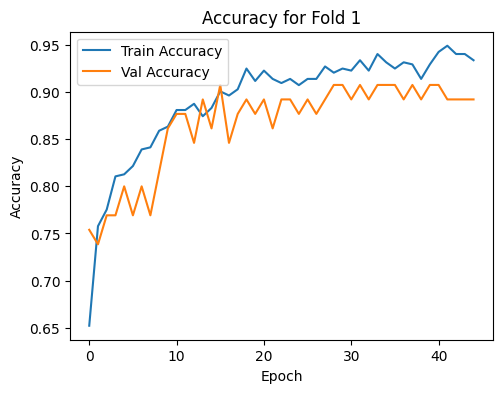

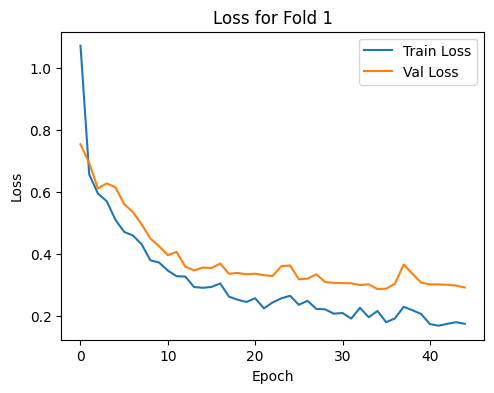

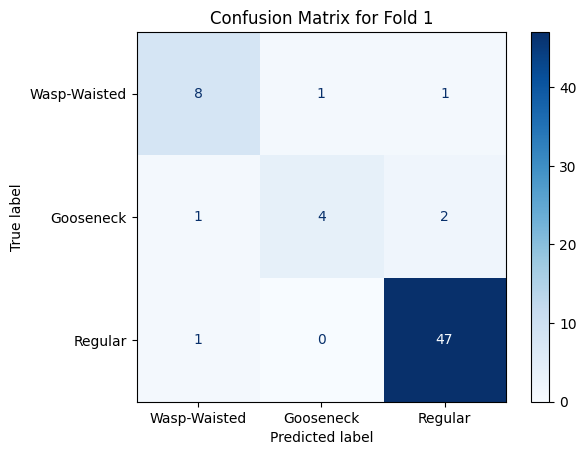

Fold 1 Accuracy: 0.9076923076923077
Fold 1 F1-score: 0.9031920460491888
Fold 1 Recall: 0.9076923076923077
Fold 1 Precision: 0.9033846153846153
Fold 2
X_train shape:  (454, 512, 3)
X_test shape:  (65, 512, 3)
y_train shape:  (454, 3)
y_test shape:  (65, 3)


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6811 - loss: 0.8558 - val_accuracy: 0.7538 - val_loss: 0.5586 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7741 - loss: 0.6393 - val_accuracy: 0.8462 - val_loss: 0.5306 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7774 - loss: 0.6198 - val_accuracy: 0.8154 - val_loss: 0.5438 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7955 - loss: 0.5483 - val_accuracy: 0.8615 - val_loss: 0.4076 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8226 - loss: 0.4568 - val_accuracy: 0.8615 - val_loss: 0.3986 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8137 - loss: 0.4866 - val_accuracy: 0.8615 - val_loss: 0.3622 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8414 - loss: 0.4566 - 

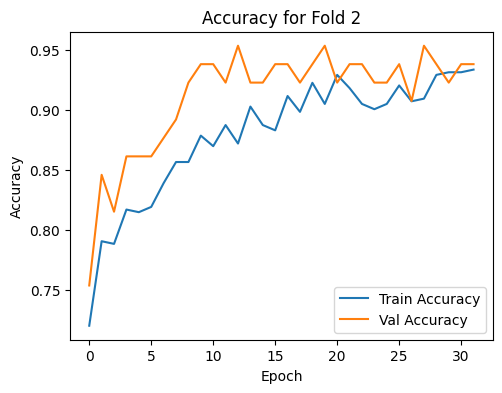

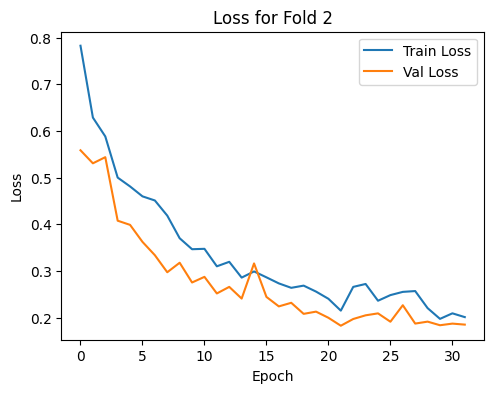

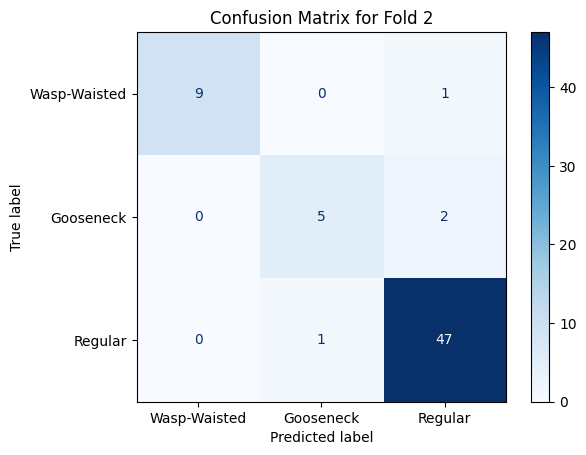

Fold 2 Accuracy: 0.9384615384615385
Fold 2 F1-score: 0.9369094757180356
Fold 2 Recall: 0.9384615384615385
Fold 2 Precision: 0.9377435897435897
Fold 3
X_train shape:  (454, 512, 3)
X_test shape:  (65, 512, 3)
y_train shape:  (454, 3)
y_test shape:  (65, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7498 - loss: 0.7810 - val_accuracy: 0.7538 - val_loss: 0.7220 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7516 - loss: 0.6816 - val_accuracy: 0.8308 - val_loss: 0.6079 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7754 - loss: 0.5989 - val_accuracy: 0.8308 - val_loss: 0.4174 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8122 - loss: 0.5261 - val_accuracy: 0.8462 - val_loss: 0.4464 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8327 - loss: 0.4565 - val_accuracy: 0.8769 - val_loss: 0.5120 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8278 - loss: 0.4930 - val_accuracy: 0.9077 - val_loss: 0.3655 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8423 - loss: 0.4280 - val_accuracy

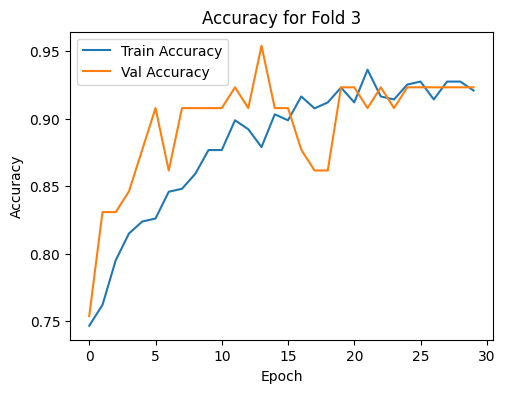

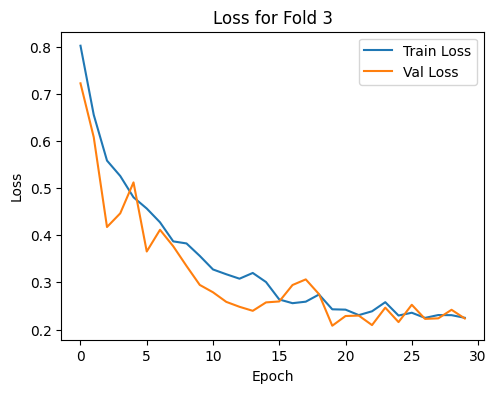

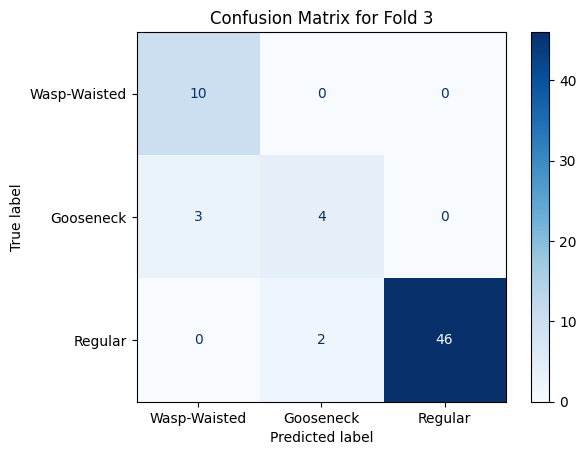

Fold 3 Accuracy: 0.9230769230769231
Fold 3 F1-score: 0.9228010443978565
Fold 3 Recall: 0.9230769230769231
Fold 3 Precision: 0.9285996055226824
Fold 4
X_train shape:  (454, 512, 3)
X_test shape:  (65, 512, 3)
y_train shape:  (454, 3)
y_test shape:  (65, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6175 - loss: 1.1516 - val_accuracy: 0.8308 - val_loss: 0.6562 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7942 - loss: 0.5873 - val_accuracy: 0.8154 - val_loss: 0.5969 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8071 - loss: 0.5760 - val_accuracy: 0.8154 - val_loss: 0.5605 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8327 - loss: 0.4210 - val_accuracy: 0.7692 - val_loss: 0.5933 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8372 - loss: 0.4487 - val_accuracy: 0.8615 - val_loss: 0.4946 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8649 - loss: 0.3638 - val_accuracy: 0.8154 - val_loss: 0.5298 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8658 - loss: 0.3619 - val_accuracy

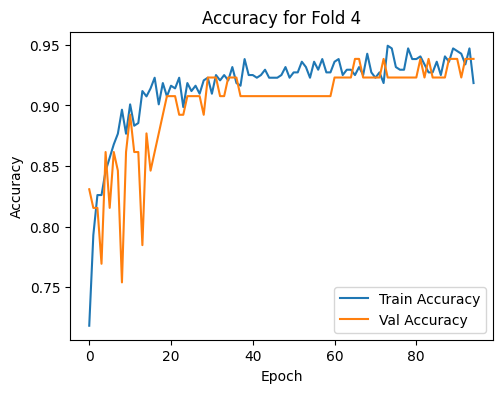

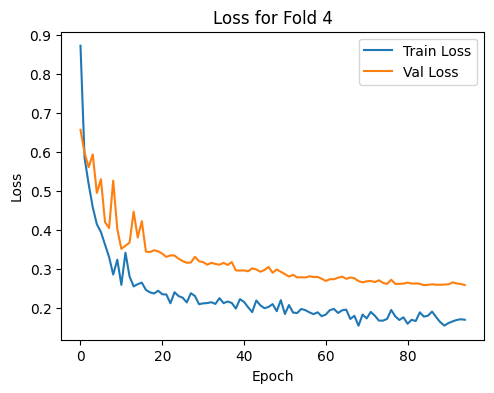

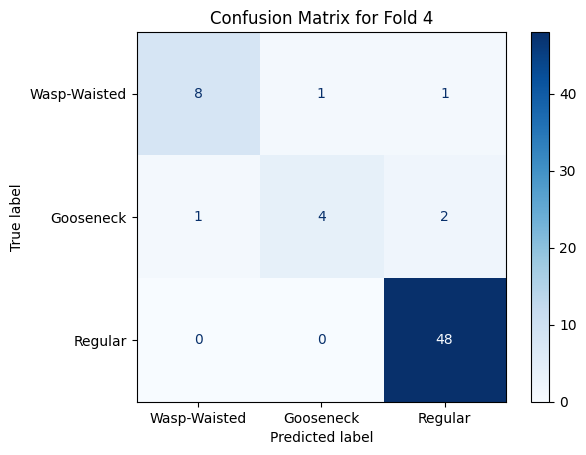

Fold 4 Accuracy: 0.9230769230769231
Fold 4 F1-score: 0.9174334437492333
Fold 4 Recall: 0.9230769230769231
Fold 4 Precision: 0.9179286073403721
Fold 5
X_train shape:  (454, 512, 3)
X_test shape:  (65, 512, 3)
y_train shape:  (454, 3)
y_test shape:  (65, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6469 - loss: 0.9934 - val_accuracy: 0.7692 - val_loss: 0.6153 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7675 - loss: 0.6879 - val_accuracy: 0.8308 - val_loss: 0.5319 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7870 - loss: 0.5746 - val_accuracy: 0.8308 - val_loss: 0.4930 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8306 - loss: 0.4750 - val_accuracy: 0.8615 - val_loss: 0.4219 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8259 - loss: 0.4826 - val_accuracy: 0.8615 - val_loss: 0.3959 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8462 - loss: 0.4055 - val_accuracy: 0.8615 - val_loss: 0.3372 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8469 - loss: 0.4016 - val_accuracy

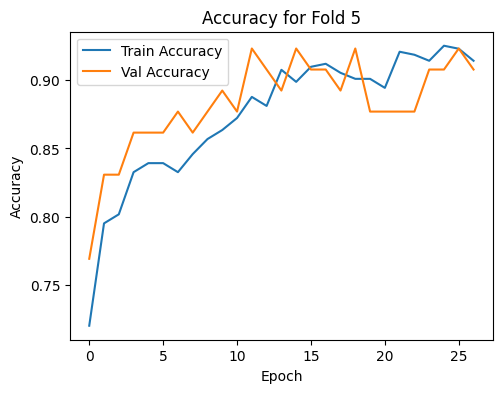

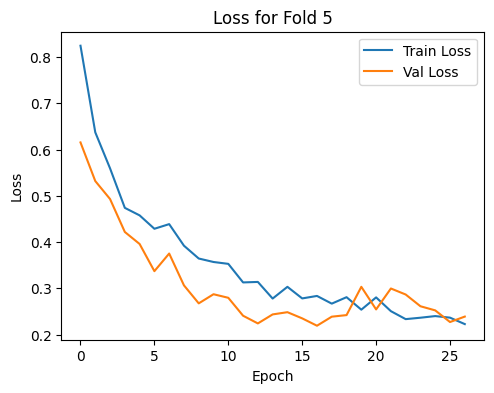

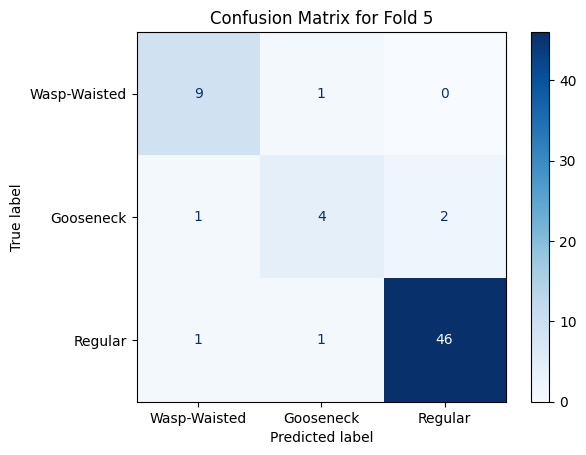

Fold 5 Accuracy: 0.9076923076923077
Fold 5 F1-score: 0.905832628909552
Fold 5 Recall: 0.9076923076923077
Fold 5 Precision: 0.9053613053613053
Fold 6
X_train shape:  (454, 512, 3)
X_test shape:  (65, 512, 3)
y_train shape:  (454, 3)
y_test shape:  (65, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6053 - loss: 1.1143 - val_accuracy: 0.7538 - val_loss: 0.6504 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7729 - loss: 0.6348 - val_accuracy: 0.7692 - val_loss: 0.6874 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8076 - loss: 0.5762 - val_accuracy: 0.8308 - val_loss: 0.5352 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8118 - loss: 0.5438 - val_accuracy: 0.8308 - val_loss: 0.4960 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7883 - loss: 0.5686 - val_accuracy: 0.8308 - val_loss: 0.4146 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8119 - loss: 0.5012 - val_accuracy: 0.8462 - val_loss: 0.4469 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8450 - loss: 0.4478 - val_accuracy

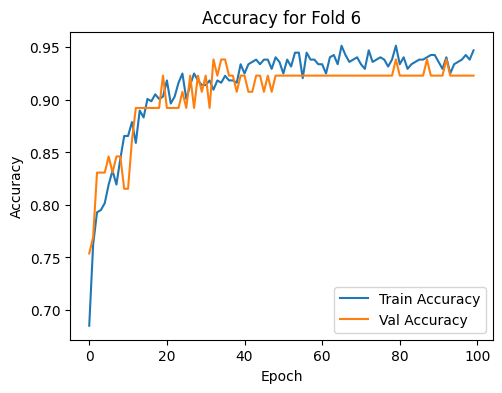

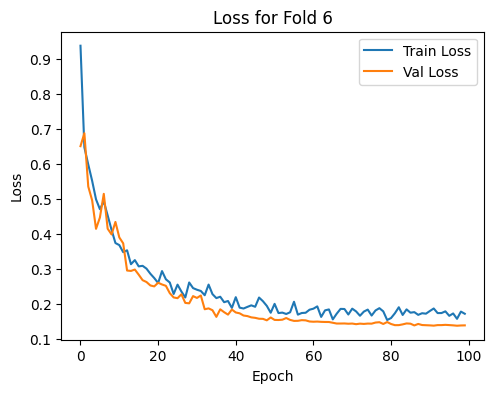

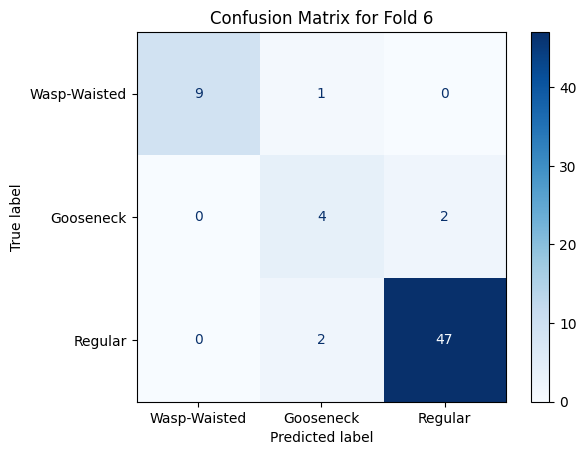

Fold 6 Accuracy: 0.9230769230769231
Fold 6 F1-score: 0.9256306446589847
Fold 6 Recall: 0.9230769230769231
Fold 6 Precision: 0.9296703296703297
Fold 7
X_train shape:  (454, 512, 3)
X_test shape:  (65, 512, 3)
y_train shape:  (454, 3)
y_test shape:  (65, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.6432 - loss: 1.0257 - val_accuracy: 0.7692 - val_loss: 0.5936 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7903 - loss: 0.6165 - val_accuracy: 0.8308 - val_loss: 0.5975 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7803 - loss: 0.5920 - val_accuracy: 0.8308 - val_loss: 0.4625 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8496 - loss: 0.4477 - val_accuracy: 0.8308 - val_loss: 0.4618 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8308 - loss: 0.4560 - val_accuracy: 0.8308 - val_loss: 0.4047 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8527 - loss: 0.3697 - val_accuracy: 0.8769 - val_loss: 0.4150 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8602 - loss: 0.4017 - val_accuracy

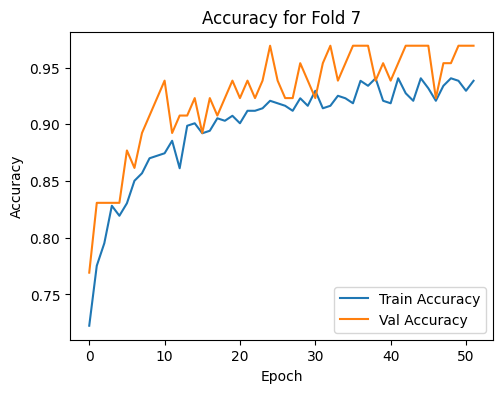

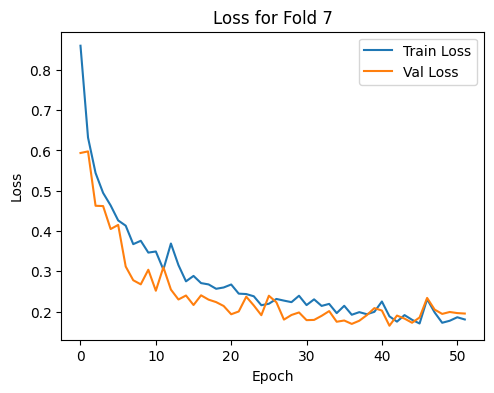

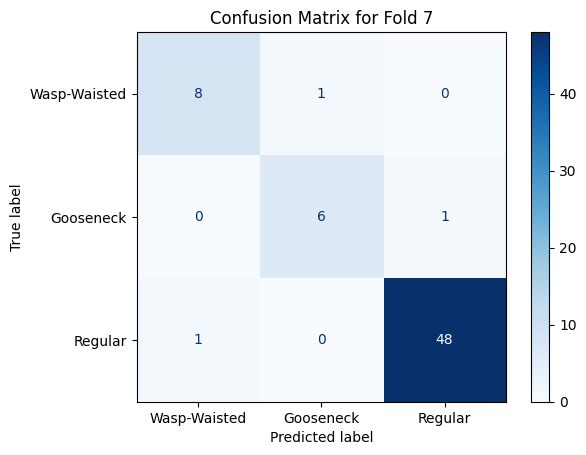

Fold 7 Accuracy: 0.9538461538461539
Fold 7 F1-score: 0.9538461538461539
Fold 7 Recall: 0.9538461538461539
Fold 7 Precision: 0.9538461538461539
Fold 8
X_train shape:  (455, 512, 3)
X_test shape:  (64, 512, 3)
y_train shape:  (455, 3)
y_test shape:  (64, 3)
Epoch 1/100


c:\Users\willm\miniconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.6115 - loss: 0.9524 - val_accuracy: 0.7969 - val_loss: 0.7484 - learning_rate: 0.0010
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7834 - loss: 0.6722 - val_accuracy: 0.8125 - val_loss: 0.6915 - learning_rate: 0.0010
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8053 - loss: 0.6174 - val_accuracy: 0.8281 - val_loss: 0.6909 - learning_rate: 0.0010
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8112 - loss: 0.5173 - val_accuracy: 0.8125 - val_loss: 0.6828 - learning_rate: 0.0010
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8160 - loss: 0.4962 - val_accuracy: 0.8438 - val_loss: 0.6451 - learning_rate: 0.0010
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7951 - loss: 0.4758 - val_accuracy: 0.8594 - val_loss: 0.5222 - learning_rate: 0.0010
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8498 - loss: 0.3548 - val_accuracy

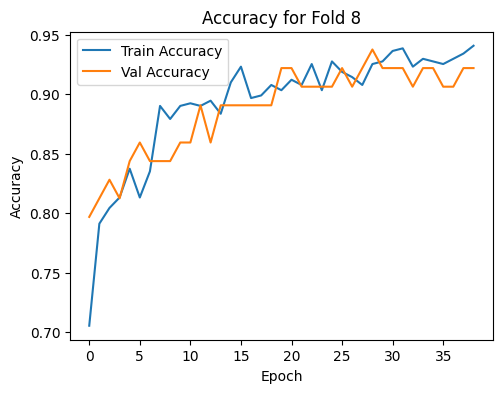

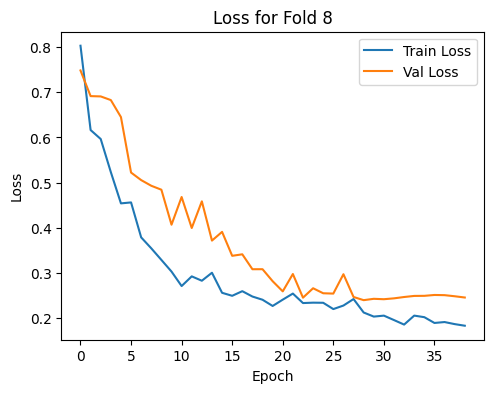

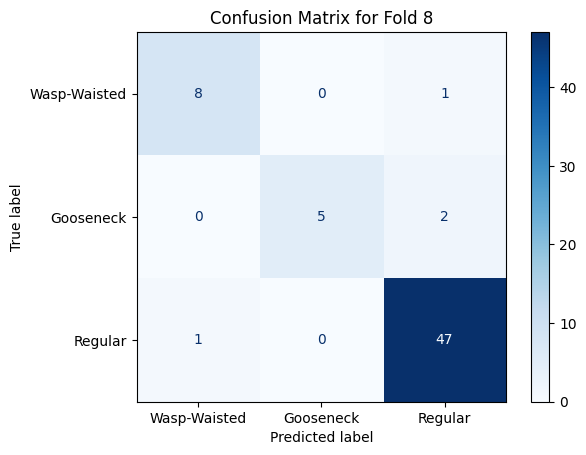

Fold 8 Accuracy: 0.9375
Fold 8 F1-score: 0.9355335884353742
Fold 8 Recall: 0.9375
Fold 8 Precision: 0.939375


In [ ]:
fold = 1
conf_matrices = []
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []
accuracy_scores = []
f1_scores = []
recall_scores = []
precision_scores = []

for train_index, test_index in skf.split(X, y):
    print(f"Fold {fold}")
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    print("X_train shape: ", X_train.shape)
    print("X_test shape: ", X_test.shape)
    print("y_train shape: ", y_train.shape)
    print("y_test shape: ", y_test.shape)
    model = create_model()
    
    # callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

    # Training
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=32,
        validation_data = (X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    train_accuracies.append(history.history['accuracy'])
    val_accuracies.append(history.history['val_accuracy'])

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(f'Accuracy for Fold {fold}')
    plt.show

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(f'Loss for Fold {fold}')
    plt.savefig(f"1-D_CNN_loss_fold_{fold}.svg", bbox_inches="tight", pad_inches=0.01)
    plt.show

    # predictions
    y_pred_probs = model.predict(X_test)
    y_pred = np.argmax(y_pred_probs, axis=1)
    y_true = np.argmax(y_test, axis=1)

    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    conf_matrices.append(conf_matrix)

    # Plot the confusion matrix for the current fold
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Wasp-Waisted", "Gooseneck", "Regular"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for Fold {fold}')
    plt.savefig(f"1-D_CNN_CM_fold_{fold}.svg", bbox_inches="tight", pad_inches=0.01)
    plt.show()

    # Calculate metrics
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    precision = precision_score(y_true, y_pred, average='weighted')

    # Print the average scores across all folds
    print(f"Fold {fold} Accuracy: {acc}")
    print(f"Fold {fold} F1-score: {f1}")
    print(f"Fold {fold} Recall: {recall}")
    print(f"Fold {fold} Precision: {precision}")

    accuracy_scores.append(acc)
    f1_scores.append(f1)
    recall_scores.append(recall)
    precision_scores.append(precision)

    fold += 1

In [5]:
# Print the average scores across all folds
print(f"Average Accuracy: {np.mean(accuracy_scores)}")
print(f"Average F1-score: {np.mean(f1_scores)}")
print(f"Average Recall: {np.mean(recall_scores)}")
print(f"Average Precision: {np.mean(precision_scores)}")

Average Accuracy: 0.9268028846153846
Average F1-score: 0.9251473782205474
Average Recall: 0.9268028846153846
Average Precision: 0.9269886508586311


In [ ]:
# Create a DataFrame with metrics per fold
num_folds = len(accuracy_scores)

metrics_df = pd.DataFrame({
    "Fold": [f"Fold {i+1}" for i in range(num_folds)],
    "Accuracy": accuracy_scores,
    "F1-score": f1_scores,
    "Recall": recall_scores,
    "Precision": precision_scores
})

avg_row = {
    "Fold": "Average",
    "Accuracy": np.mean(accuracy_scores),
    "F1-score": np.mean(f1_scores),
    "Recall": np.mean(recall_scores),
    "Precision": np.mean(precision_scores)
}
metrics_df = pd.concat([metrics_df, pd.DataFrame([avg_row])], ignore_index=True)

metrics_df[["Accuracy", "F1-score", "Recall", "Precision"]] = (
    metrics_df[["Accuracy", "F1-score", "Recall", "Precision"]].round(4)
)

print(metrics_df)

      Fold  Accuracy  F1-score  Recall  Precision
0   Fold 1    0.9077    0.9032  0.9077     0.9034
1   Fold 2    0.9385    0.9369  0.9385     0.9377
2   Fold 3    0.9231    0.9228  0.9231     0.9286
3   Fold 4    0.9231    0.9174  0.9231     0.9179
4   Fold 5    0.9077    0.9058  0.9077     0.9054
5   Fold 6    0.9231    0.9256  0.9231     0.9297
6   Fold 7    0.9538    0.9538  0.9538     0.9538
7   Fold 8    0.9375    0.9355  0.9375     0.9394
8  Average    0.9268    0.9251  0.9268     0.9270


In [ ]:


def save_metrics_table_as_svg(df, filename="metrics_table.svg"):
    n_rows, n_cols = df.shape
    fig, ax = plt.subplots(figsize=(n_cols * 2.0, n_rows * 0.5 + 1))

    ax.axis("off")

    table = ax.table(
        cellText=df.values,
        colLabels=df.columns,
        cellLoc="center",
        loc="center"
    )

    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.1, 1.2)  # (x_scale, y_scale)

    plt.tight_layout()
    plt.savefig(filename, format="svg", bbox_inches="tight", pad_inches=0.05)
    plt.close(fig)
    print(f"Saved metrics table as {filename}")


save_metrics_table_as_svg(metrics_df, filename="1-D_CNN_kfold_metrics.svg")

Saved metrics table as 1-D_CNN_kfold_metrics.svg
